In [1]:
from qiskit_research.vqls import VQLS
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit import Aer
import numpy as np

# Variational Linear Solver

In [2]:
A = np.random.rand(4,4)
A = (A+A.T)
b = np.random.rand(4)

In [3]:
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
classical_solution = NumPyLinearSolver().solve(A,b/np.linalg.norm(b))

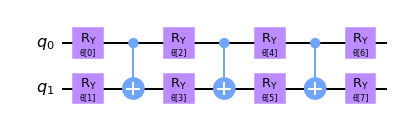

In [4]:
backend = Aer.get_backend('aer_simulator_statevector')
ansatz = RealAmplitudes(2, entanglement='full', reps=3, insert_barriers=False)
vqls  = VQLS(
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200, disp=True),
    quantum_instance=backend
)
vqls.ansatz.decompose().draw('mpl')

In [5]:
res = vqls.solve(A,b)

Cost function 0.786168
Cost function 0.998308
Cost function 0.147771
Cost function 0.159450
Cost function 0.352193
Cost function 0.157252
Cost function 0.331879
Cost function 0.147353
Cost function 0.440996
Cost function 0.147415
Cost function 0.138837
Cost function 0.139754
Cost function 0.141885
Cost function 0.139189
Cost function 0.139243
Cost function 0.139462
Cost function 0.141791
Cost function 0.139990
Cost function 0.141679
Cost function 0.136090
Cost function 0.136210
Cost function 0.136582
Cost function 0.312391
Cost function 0.138426
Cost function 0.136283
Cost function 0.136212
Cost function 0.135684
Cost function 0.135553
Cost function 0.136033
Cost function 0.135447
Cost function 0.135807
Cost function 0.135498
Cost function 0.134825
Cost function 0.134694
Cost function 0.133420
Cost function 0.131600
Cost function 0.137161
Cost function 0.131890
Cost function 0.135796
Cost function 0.131845
Cost function 0.136160
Cost function 0.131501
Cost function 0.135886
Cost functi

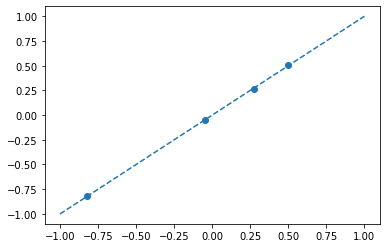

In [7]:
from qiskit.quantum_info import Statevector 
import matplotlib.pyplot as plt
ref_solution = classical_solution.state / np.linalg.norm(classical_solution.state) 
vqls_solution = np.real(Statevector(res.state).data )


plt.scatter(ref_solution, vqls_solution)
plt.plot([-1,1],[-1,1],'--')

In [8]:
print(b)

[0.91580142 0.76373378 0.78265317 0.73945564]
